In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import joblib

import warnings 
warnings.filterwarnings('ignore')


In [31]:
data = pd.read_csv("/content/sample_data/Review_data.csv")


In [32]:
data.head()

,Unnamed: 0,Number of ratings,Full Review
0,0,5,Good phone at this price point\nCamera is by f...
1,1,5,"Awesome Purchase…\nFirstly, thank you Flipkart..."
2,2,5,Very nice product... i am fully satisfied than...
3,3,5,"Apple iPhone 12 mini is incredible, peaceful t..."
4,4,5,Switched from android.Truecaller not working f...


In [33]:
data.shape

(21367, 3)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21367 entries, 0 to 21366
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         21367 non-null  int64 
 1   Number of ratings  21367 non-null  int64 
 2   Full Review        21367 non-null  object
dtypes: int64(2), object(1)
memory usage: 500.9+ KB


In [35]:
data.isnull().sum()

Unnamed: 0           0
Number of ratings    0
Full Review          0
dtype: int64

 Exploratory Data Analysis
 & Data Cleaning

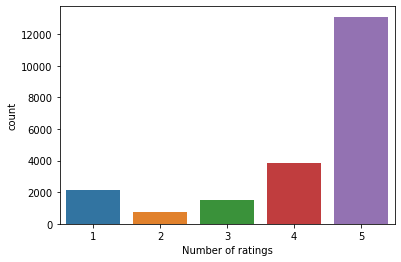

In [36]:
sns.countplot(x='Number of ratings',data=data)

In [37]:
#replacing email address with email
data['Full Review'] =data['Full Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
data['Full Review'] = data['Full Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
data['Full Review'] = data['Full Review'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['Full Review'] = data['Full Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'number'
data['Full Review'] = data['Full Review'].str.replace(r'\d+(\.\d+)?', 'number')

# Remove punctuation
data['Full Review'] = data['Full Review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
data['Full Review'] = data['Full Review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
data['Full Review'] = data['Full Review'].str.replace(r'^\s+|\s+?$', '')

In [38]:
data['Full Review'][0]

'Good phone at this price point Camera is by far the best among all other phones Wide angle lens is quite accurate with colours and distortion is manageable Portrait AI is good HDR gives a sense of false positivity but makes the picture looks better compared to a dslr iOS doesn t hang and makes multitasking pretty easy Battery is ok Extensive user like me number numberh screen time needs to charge twice daily considering the usage its ok Screen size and display is awesome Fits into jeans eas'

In [39]:
data['Full Review'] = data['Full Review'].apply(lambda x: x.lower())

data['Full Review'] = data['Full Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
data['Full Review'] = data['Full Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
data['Full Review'] = data['Full Review'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [40]:
 data['Full Review'][0]

'good phone price point camera far best among phone wide angle lens quite accurate colour distortion manageable portrait ai good hdr give sense false positivity make picture look better compared dslr io hang make multitasking pretty easy battery ok extensive user like number numberh screen time need charge twice daily considering usage ok screen size display awesome fit jean ea'

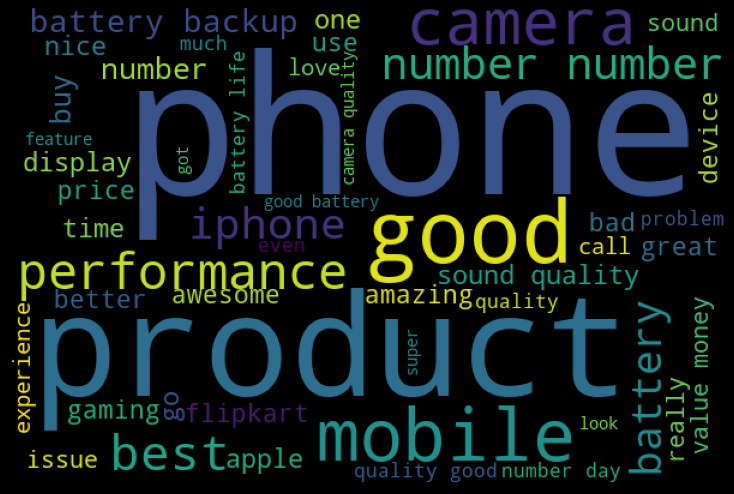

In [41]:
# checking the most frequent words
words = data['Full Review']
words_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(words))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(words_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Data Preprocessing & Model Building and Model Evaluation

In [42]:
#  Convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features = 20000, stop_words='english')
X_features = tf_vec.fit_transform(data['Full Review'])
X = X_features

In [43]:
y = data['Number of ratings']

In [44]:
x_train,x_test,y_train,y_test=train_test_split( X,y,random_state=56,test_size=.30)

In [45]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.8827895159133459
Test accuracy is 0.6967711745437529
[[ 452   16   17    5  144]
 [ 118   34    3    4   73]
 [  80    7   63   28  302]
 [  29    3   15  130  964]
 [  42    5   13   76 3788]]
              precision    recall  f1-score   support

           1       0.63      0.71      0.67       634
           2       0.52      0.15      0.23       232
           3       0.57      0.13      0.21       480
           4       0.53      0.11      0.19      1141
           5       0.72      0.97      0.82      3924

    accuracy                           0.70      6411
   macro avg       0.59      0.41      0.42      6411
weighted avg       0.66      0.70      0.63      6411



In [46]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.8827895159133459
Test accuracy is 0.6493526750896896
[[ 401   50   47   23  113]
 [  99   44   18   13   58]
 [  73   18   96   44  249]
 [  41    9   58  213  820]
 [  60   25   78  352 3409]]
              precision    recall  f1-score   support

           1       0.59      0.63      0.61       634
           2       0.30      0.19      0.23       232
           3       0.32      0.20      0.25       480
           4       0.33      0.19      0.24      1141
           5       0.73      0.87      0.80      3924

    accuracy                           0.65      6411
   macro avg       0.46      0.42      0.43      6411
weighted avg       0.60      0.65      0.62      6411



In [47]:
# MultinomialNBClassifiear
MN = MultinomialNB()

MN.fit(x_train, y_train)
y_pred_train = MN.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = MN.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.6715699384862263
Test accuracy is 0.6526282951177663
[[ 273    0    0    5  356]
 [  71    0    1    1  159]
 [  45    0    0    5  430]
 [  17    0    0   13 1111]
 [  16    0    0   10 3898]]
              precision    recall  f1-score   support

           1       0.65      0.43      0.52       634
           2       0.00      0.00      0.00       232
           3       0.00      0.00      0.00       480
           4       0.38      0.01      0.02      1141
           5       0.65      0.99      0.79      3924

    accuracy                           0.65      6411
   macro avg       0.34      0.29      0.27      6411
weighted avg       0.53      0.65      0.54      6411



In [48]:
# GradientBoostingClassifier
GBC = GradientBoostingClassifier()

GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = GBC.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.7056699652313453
Test accuracy is 0.6696303228825456
[[ 331   16   11    9  267]
 [  87   14    3    7  121]
 [  61    5   27   20  367]
 [  13    1   19   60 1048]
 [  30    3    6   24 3861]]
              precision    recall  f1-score   support

           1       0.63      0.52      0.57       634
           2       0.36      0.06      0.10       232
           3       0.41      0.06      0.10       480
           4       0.50      0.05      0.10      1141
           5       0.68      0.98      0.81      3924

    accuracy                           0.67      6411
   macro avg       0.52      0.34      0.34      6411
weighted avg       0.61      0.67      0.58      6411



Prediction

In [59]:
from sklearn.svm import SVC
# Support vactor classifier
svc = SVC()

svc.fit(x_train, y_train)
y_pred_train = svc.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = svc.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.7931933672104841
Test accuracy is 0.6920917173607861
[[ 461    2   19    2  150]
 [ 126   13    6    2   85]
 [  95    0   50   10  325]
 [  31    0   23   64 1023]
 [  41    0   12   22 3849]]
              precision    recall  f1-score   support

           1       0.61      0.73      0.66       634
           2       0.87      0.06      0.11       232
           3       0.45      0.10      0.17       480
           4       0.64      0.06      0.10      1141
           5       0.71      0.98      0.82      3924

    accuracy                           0.69      6411
   macro avg       0.66      0.38      0.37      6411
weighted avg       0.67      0.69      0.60      6411



In [49]:
corpus = "It is good product and i am happy with it"
test_corpus = tf_vec.transform([corpus])
print(RF.predict(test_corpus))

[5]


In [50]:
corpus = "It is bad product and i am not happy with it"
test_corpus = tf_vec.transform([corpus])
print(RF.predict(test_corpus))

[1]


In [51]:
corpus = "worst and damage product "
test_corpus = tf_vec.transform([corpus])
print(RF.predict(test_corpus))

[1]


Random Forest model giving higher accuarcy then other models.Although our model is not giving good accuracy due to unbalance data. but as per above it is predicting effectively. 

